In [1]:
%matplotlib inline
from pprint import pprint
from matplotlib import pyplot as plt
import itertools
import pandas
import seaborn
import numpy

import market
import simulate
import harvesting
import withdrawal
import metrics
import montecarlo
import mortality
import lens

In [2]:
seaborn.set(style="whitegrid")
seaborn.set_context('poster')

In [3]:
Market = market.Returns_US_1871()

In [4]:
def get_rq(stock_pct, age, withdrawal_pct):
    # I can't figure out how to to joint life expectancy so I'll
    # just use female life expectancy for now :/
    life_expectancy = mortality.life_expectancy(None, age)
    mean = montecarlo.simba_mean[stock_pct]
    stddev = montecarlo.simba_stddev[stock_pct]
    
    return metrics.probability_of_ruin(mean, stddev, life_expectancy, float(withdrawal_pct))

In [5]:
df = pandas.DataFrame(index=numpy.arange(1,26))
for year in range(1871, 2019 - 30 + 1):
    s = simulate.withdrawals(Market.iter_from(year), years=25, harvesting=harvesting.N_60_RebalanceHarvesting, withdraw=withdrawal.Guyton)
    r_series = []
    for (i, age) in zip(s, itertools.count(start=65)):
        r = get_rq(60, age, i.withdraw_n/i.portfolio_pre.value_n)
        r_series.append(r)
    df[year] = r_series
df.head()

,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
1,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,...,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503,0.147503
2,0.130627,0.141055,0.138233,0.112428,0.119985,0.191973,0.099329,0.088276,0.091213,0.087512,...,0.115056,0.187189,0.100788,0.121438,0.150090,0.089529,0.110739,0.174654,0.131077,0.103969
3,0.124077,0.131864,0.104796,0.089383,0.156401,0.134323,0.056413,0.068425,0.067916,0.108203,...,0.146103,0.132313,0.105675,0.122519,0.091579,0.084959,0.130662,0.157310,0.091275,0.134788
4,0.115116,0.099622,0.082908,0.119440,0.106578,0.079715,0.042379,0.049837,0.083754,0.102457,...,0.100110,0.108097,0.105961,0.095903,0.086980,0.099820,0.115218,0.112171,0.118233,0.083115
5,0.085919,0.078559,0.110641,0.078833,0.061425,0.061415,0.029873,0.081089,0.078269,0.095454,...,0.079984,0.108449,0.081965,0.069250,0.102079,0.086440,0.079358,0.144856,0.094505,0.078085


<AxesSubplot:>

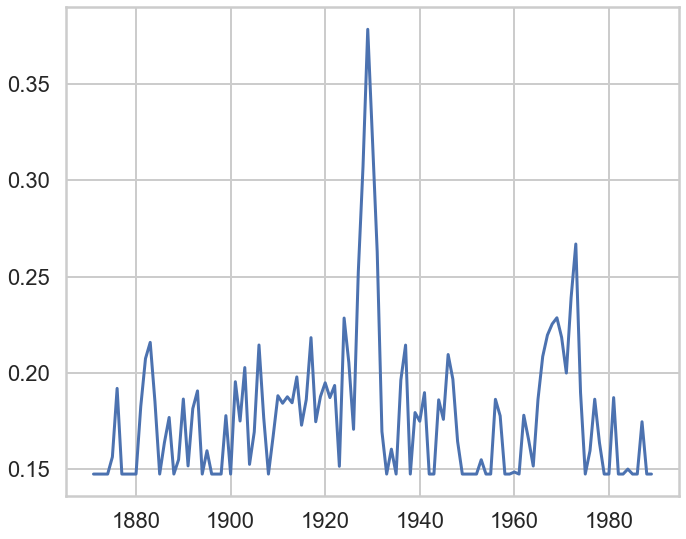

In [6]:
plt.figure(figsize=(11,9))
df.max().plot()

<AxesSubplot:>

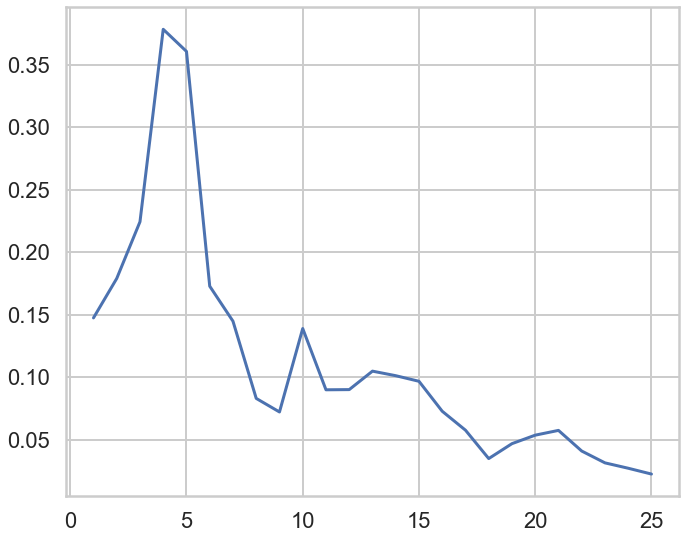

In [7]:
plt.figure(figsize=(11,9))
df[1929].plot()

In [8]:
mw = simulate.calc_lens(harvesting.N_60_RebalanceHarvesting,
                   withdrawal.Guyton,
                   25,
                   lambda s: max([float(x.withdraw_pct_cur) for x in s])
                  )

<AxesSubplot:>

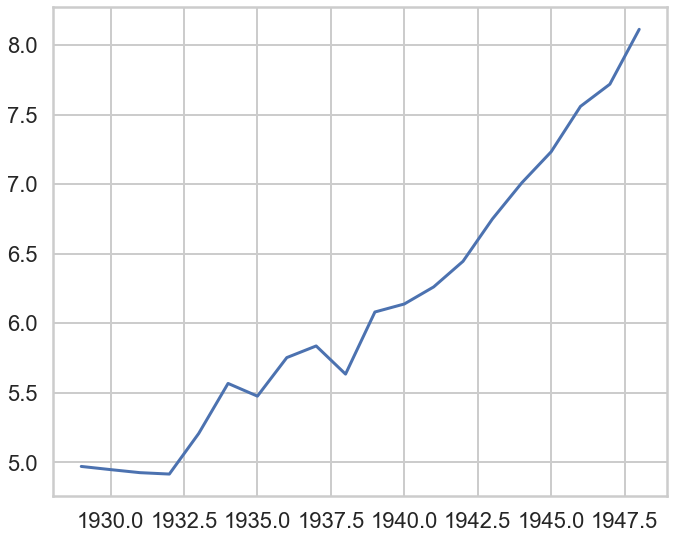

In [9]:
s = simulate.withdrawals(Market.iter_from(1929), harvesting=harvesting.N_60_RebalanceHarvesting,
                     withdraw=withdrawal.VPW,
                    years=20)
plt.figure(figsize=(11,9))
pandas.Series([float(n.withdraw_pct_cur) * 100 for n in s], index=range(1929, 1929+20)).plot()

<AxesSubplot:>

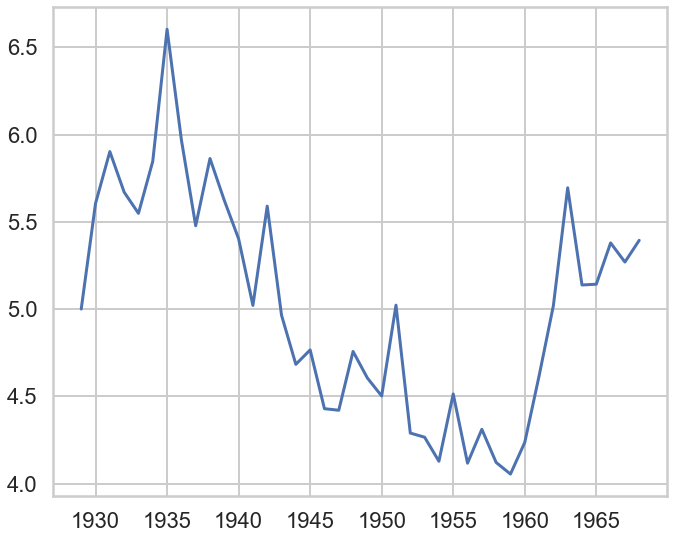

In [10]:
s = simulate.withdrawals(Market.iter_from(1969), harvesting=harvesting.N_60_RebalanceHarvesting,
                     withdraw=withdrawal.Guyton)
plt.figure(figsize=(11,9))
pandas.Series([float(n.withdraw_pct_cur) * 100 for n in s], index=range(1929, 1929+40)).plot()

In [11]:
s = simulate.withdrawals(Market.iter_from(1971), harvesting=harvesting.N_60_RebalanceHarvesting,
                     withdraw=withdrawal.ConstantDollar, years=30)
lens.calc_shortfall_years(s)

0

<AxesSubplot:>

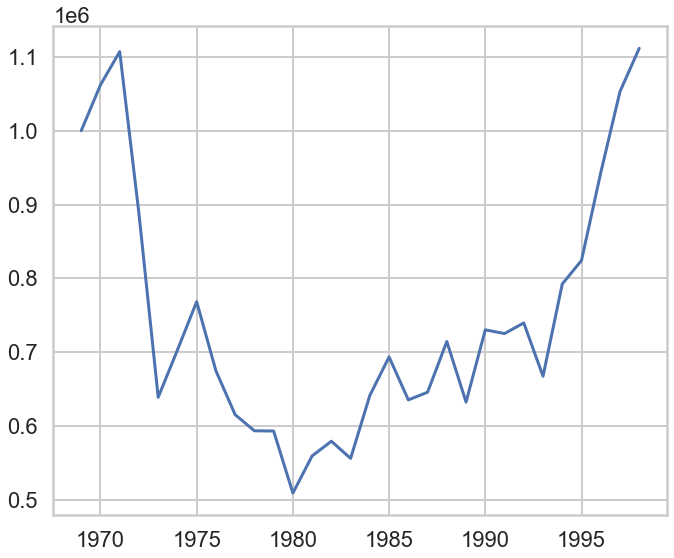

In [12]:
plt.figure(figsize=(11,9))
pandas.Series([float(n.portfolio_pre.value_r) for n in s], index=range(1969, 1969+30)).plot()

In [13]:
s = simulate.calc_lens(harvesting.N_60_RebalanceHarvesting, withdrawal.ConstantDollar, 30, lens.calc_pwa0)

In [14]:
s

1871    0.08697841346861772184514685171
1872    0.08681479098449370287317014062
1873    0.08916112589069613304586995557
1874    0.09099198789234595095395175358
1875    0.08612816149847119597603570199
                     ...               
1984    0.08652437950564485382996405773
1985    0.09075612136844306883743057048
1986    0.07932455858136134775802532017
1987    0.07372611041732950731526673787
1988    0.08079532632190050074540524932
Length: 118, dtype: object

In [15]:
mw = simulate.calc_lens(harvesting.N_60_RebalanceHarvesting,
                   withdrawal.ConstantDollar,
                   25,
                   lambda s: max([float(x.withdraw_pct_cur) for x in s])
                  )

In [16]:
mw.sort_values()

1871    0.040000
1922    0.040000
1924    0.040000
1925    0.040000
1926    0.040000
          ...   
1906    0.126521
1965    0.146680
1968    0.171009
1966    0.183955
1969    0.191798
Length: 123, dtype: float64

In [17]:
df = pandas.DataFrame(index=numpy.arange(1,26))
for year in range(1871, 2019 - 30 + 1):
    s = simulate.withdrawals(Market.iter_from(year), years=25, harvesting=harvesting.N_60_RebalanceHarvesting, withdraw=withdrawal.ConstantDollar)
    df[year] = [n.withdraw_pct_cur for n in s]
df.head()

,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
1,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
2,0.03836567878607955927498802366,0.03947944932963503323063423263,0.03918162562583660212847727030,0.03632452748247860248161786730,0.03718879723723320958181877808,0.04489990487009270751764792602,0.03476012075538039509466131202,0.03336119968940353122667327685,0.03841690956084036713592580949,0.03326143821635502398810311069,...,0.03887971281997874011811704929,0.04527411027133866690616540432,0.03493908418909830114509004435,0.03735213821205190215454935629,0.04041720251810750720093769069,0.03352397542806581730663904391,0.03612782520595276502631929773,0.04286114272619021474997611117,0.03841450357542554697591441195,0.03532480334404959297025911403
3,0.03780205434203419562570266907,0.03865077183645124288380180190,0.03555105360696377371445881938,0.03364283661503017442231734196,0.04162245690566219594379719649,0.03921832850993603248622626612,0.02883360005586050100099686608,0.03182079956832386661926025452,0.03189244384298679573770689608,0.03672829432318609910260068363,...,0.04395480692231072646488624783,0.03976435615785964515034136745,0.03245514535202245805027689056,0.03763791334430468234805289885,0.03388835288874367818018856452,0.03007581920139278921056426738,0.03855647484793898761463495925,0.04128528312888320235562325769,0.03386868896531293348002546888,0.03905394479823106095480001557
4,0.03694405676460255773345106020,0.03505002229854507482242260738,0.03290005205144716740038490471,0.03751557815173122021481678886,0.03623126173766343699466981648,0.03268265338391924822781514817,0.02737404377456960973270230792,0.02623660521054690507118479604,0.03516681406333307083277371696,0.03621995289481645748481147391,...,0.03855234625302258110001938972,0.03712298587851107638371174927,0.03253793113874836210413725777,0.03146688306247217473390559823,0.03041418521137391983329884604,0.03189735225311792196279288595,0.03697260275549304145912783795,0.03650874344765610988474101673,0.03738767718507490163907264451,0.03296673971160011113736714609
5,0.03344293424849403335449684553,0.03241954005005175213703150003,0.03665910962559762608477956990,0.03251699030412334780480339925,0.03009980211568028832808221607,0.03115171051653725544516015729,0.02246700816388338198267601994,0.02876226230047309668628440710,0.03462395973697096178064753135,0.03553171868198483468350725023,...,0.03594610734649270137463180144,0.03739810206253091585633696977,0.02705968568470209362112831974,0.02817035751185432992521034136,0.03226746941127427964516739481,0.03037663884016340050343880618,0.03254860899976888549519492682,0.04041246458830731400931823315,0.03150555875902820409386625669,0.03244743448002753689370973646


In [18]:
df[df > 0.10].max().dropna().sort_values()

1967    0.1006065890255162080948902419
1911    0.1024920568941110824755775573
1964    0.1035318537645775591410915527
1912    0.1036376947443714116164068233
1901    0.1038583573433744996791864369
1905    0.1046790253941813386198245159
1907    0.1062132225415983379105500155
1909    0.1133138135977104242480855076
1962    0.1141134175111044397993267044
1902    0.1189880029163745645158266890
1899    0.1260375811364269694473831774
1906    0.1265209285506254219574913405
1965    0.1466798029080959528279728389
1968    0.1710088554114393714354300835
1966    0.1839551193147225705394852237
1969    0.1917981989597442106100680156
dtype: object

<AxesSubplot:>

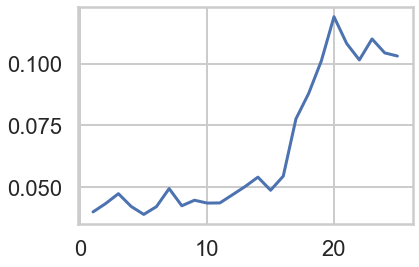

In [22]:
df[1902].astype(float).plot()